# <font color="navy"> [6기 1학기 기말고사]

<font color="blue"> 
- **아래의 문제에 답을 채워넣은 뒤 모든 결과물이 프린트 된 상태에서 `File>Download as>HTML(.html)` 형식으로 저장하여 구글폼에 업로드 해주세요.**
- **시험시간은 <font color=red>15:00 부터 16:30 까지<font color=blue> 입니다.**
- **제출 양식은 <font color=red>"6기_기말고사_홍길동" <font color=blue>입니다.**

### [문제 1] 숫자 범위의 시작과 끝을 입력으로 받아 해당 범위에 있는 소수를 반환하는 함수를 만드세요. [30점]

- 소수란 1과 자기 자신으로만 나누어 떨어지는 수를 의미합니다.
- 예) 10과 19를 입력으로 받으면 11,13,17,19를 출력합니다.
        prime(10,19) -> 11, 13, 17, 19

In [276]:
ans=[]
def return_prime(a, b):
    for i in range(a, b+1):
        for j in range(2, i):
            if i%j==0:
                break
        if i%j!=0:
            ans.append(i)
    return ans

In [277]:
return_prime(3,100)

[3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

### [문제 2] movie 데이터를 불러오고 다음의 문제를 해결하세요. [70점]
**영화( 'movie_title' ) 의 컨텐츠 등급( 'content_rating' )을 예측하는 과정입니다.**

#### [문제 2-1] 결측치 처리 [10점]
- 'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes', 'movie_imdb_link', 'plot_keywords' column 을 지우세요.
- 각 column의 결측치를 확인하고 'color'와 'gross' 열에 결측치가 있다면 해당 행을 제거하세요.
- 'budget'의 결측치는 평균값으로, 'content_rating' 는 최빈값으로 대체하세요. 이때 최빈값은 시각화하여 확인한 후 대체하세요.

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
import pandas as pd
data = pd.read_csv('./movie.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [280]:
data.drop(['actor_2_name','actor_2_facebook_likes','actor_3_name','actor_3_facebook_likes',
            'movie_imdb_link','plot_keywords'], axis=1, inplace=True)

In [281]:
data.isnull()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,False,True,False,False,False,...,False,True,True,True,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False
4912,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4913,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4914,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [282]:
nanlist=data[(data['color'].isnull()==True)|(data['gross'].isnull()==True)].index

In [283]:
data.drop(nanlist, axis=0, inplace=True)

In [284]:
df=data

In [285]:
mean=df['budget'].mean()

In [286]:
df['budget'].fillna(mean)

0       2.370000e+08
1       3.000000e+08
2       2.450000e+08
3       2.500000e+08
5       2.637000e+08
            ...     
4907    7.000000e+03
4908    7.000000e+03
4910    9.000000e+03
4914    4.152543e+07
4915    1.100000e+03
Name: budget, Length: 4052, dtype: float64

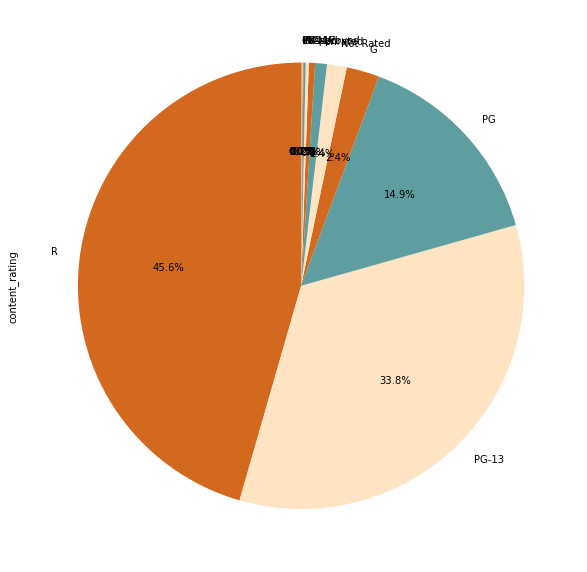

In [287]:
df['content_rating'].value_counts().plot(kind='pie', figsize=(10,12), autopct='%1.1f%%', startangle=90, colors=['chocolate','bisque','cadetblue'])

#### [문제 2-2] 시각화 및 feature 생성 [20점]
- 'content_rating' 이 `'R'`, `'PG-13'`, `'PG'` 인 데이터만 추출하여 data2 변수에 저장하고, 다음과 같은 결과가 나오도록 시각화 하세요.
![nn](boxplot.png)

In [288]:
df2=df[(df['content_rating']=='R')|(df['content_rating']=='PG')|(df['content_rating']=='PG-13')]

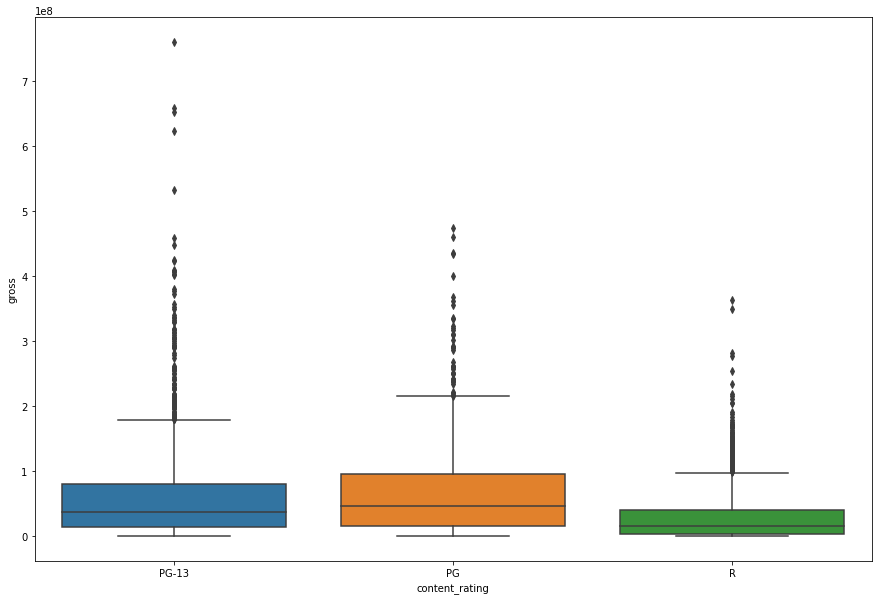

In [289]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(x='content_rating', y='gross', data=df2)

In [329]:
features = pd.DataFrame(df2[['movie_title','director_name']])
features

,movie_title,director_name
0,Avatar,James Cameron
1,Pirates of the Caribbean: At World's End,Gore Verbinski
2,Spectre,Sam Mendes
3,The Dark Knight Rises,Christopher Nolan
5,John Carter,Andrew Stanton
...,...,...
4899,Clean,Olivier Assayas
4906,Primer,Shane Carruth
4908,El Mariachi,Robert Rodriguez
4914,Shanghai Calling,Daniel Hsia


In [330]:
df2['aspect_ratio'].fillna(0, inplace=True)

C:\ANACONDA\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [331]:
df2['aspect_ratio'].isnull().value_counts()

False    3763
Name: aspect_ratio, dtype: int64

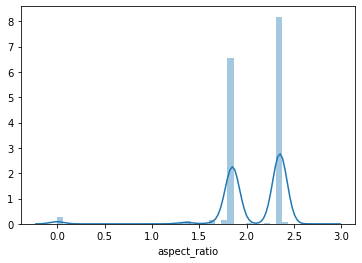

In [332]:
sns.distplot(df2['aspect_ratio'])

In [333]:
counts, bin_dividers=np.histogram(df2['aspect_ratio'], bins=3)

In [334]:
bin_dividers

array([0.  , 0.92, 1.84, 2.76])

In [335]:
bin_names=['narrow','standard','wide']
df2['aspect_ratio2']=pd.cut(x=df2['aspect_ratio'], bins=bin_dividers, labels=bin_names, include_lowest=True)

<ipython-input-335-b3a62ad253b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['aspect_ratio2']=pd.cut(x=df2['aspect_ratio'], bins=bin_dividers, labels=bin_names, include_lowest=True)


- 어쩌다보니 위에다 풀었어요

- 정수형 데이터인 'aspect_ratio' 를 범주형 데이터 `'norrow'`, `'standard'`, `'wide'` 로 다시 나누어 'aspect_ratio2' 열을 만드세요. 단, 나눈 기준에 대한 근거로 시각화 자료를 제시하세요.
- 'aspect_ratio2' 열을 더미변수로 바꾼 후 features에 concat으로 연결하세요. **(연결 후 features의 column 개수는 5개 입니다 !!)**

In [345]:
ratio=pd.get_dummies(df2['aspect_ratio2'])

In [346]:
features=pd.concat([features, ratio], axis=1, join='outer')

In [347]:
features

,movie_title,director_name,narrow,standard,wide,narrow,standard,wide
0,Avatar,James Cameron,0,1,0,0,1,0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,0,0,1,0,0,1
2,Spectre,Sam Mendes,0,0,1,0,0,1
3,The Dark Knight Rises,Christopher Nolan,0,0,1,0,0,1
5,John Carter,Andrew Stanton,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
4899,Clean,Olivier Assayas,0,0,1,0,0,1
4906,Primer,Shane Carruth,0,0,1,0,0,1
4908,El Mariachi,Robert Rodriguez,0,1,0,0,1,0
4914,Shanghai Calling,Daniel Hsia,0,0,1,0,0,1


- 영화감독별 `'gross'`, `'duration'`, `'budget'`, `'imdb_score'`의 평균을 구한 feature를 features 에 추가하세요.

In [348]:
df2['budget'].fillna(mean, inplace=True)

C:\ANACONDA\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [349]:
ndf=df2.groupby(['director_name']).mean()

In [350]:
ndf[['duration','gross','budget','imdb_score']]

,duration,gross,budget,imdb_score
director_name,,,,
Aaron Schneider,100.000000,9.176553e+06,7.500000e+06,7.100000
Aaron Seltzer,85.000000,4.854658e+07,2.000000e+07,2.700000
Abel Ferrara,99.000000,1.227324e+06,1.250000e+07,6.600000
Adam Brooks,112.000000,3.197384e+07,4.152543e+07,7.200000
Adam Goldberg,111.000000,2.580000e+03,1.650000e+06,5.400000
...,...,...,...,...
Zack Snyder,142.428571,1.557582e+08,1.225714e+08,7.142857
Zak Penn,94.000000,3.683000e+04,1.400000e+06,6.600000
Zal Batmanglij,100.500000,1.336955e+06,2.401272e+07,6.800000


In [351]:
features=features.set_index(['director_name'])

In [352]:
features=features.join(ndf)

In [353]:
features=features[['duration','gross','imdb_score']]

- feature들의 피어슨 상관계수를 다음과 동일하게 도식화 하세요. figsize는 (8,7) 입니다.
![nn](heatmap.png)

In [354]:
corr=features.corr()

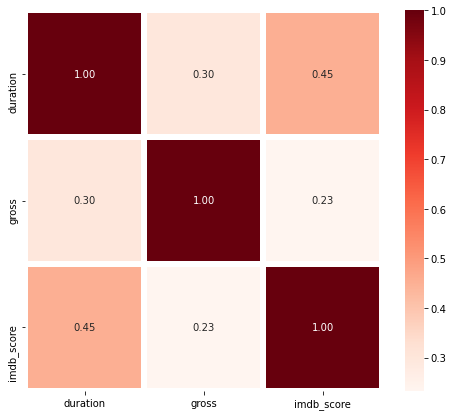

In [355]:
plt.figure(figsize=(8,7))
sns.heatmap(data=corr, annot=True, fmt='.2f',linewidth=5, cmap='Reds')
plt.show()

#### [문제 2-3] 데이터 표준화 [5점]
- 'content_rating'열을 fearures 에 추가해주세요.
- X에 `'norrow'`, `'standard'`, `'wide'`, `'duration_mean'`,`'gross_mean'`,`'budget_mean'`,`'imdb_score_mean'`열만 저장해주세요.
- Y에 `'content_rating'`열을 저장해주세요.
- StandardScaler를 이용해 X를 표준화한 다음 decribe()함수로 확인해주세요.

#### [문제 2-4] 데이터 학습 및 평가 [15점]
- X, Y를 훈련 데이터와 평가 데이터로 7:3의 비율로 나눠주세요. random_state는 10으로 고정해주세요.
- RandomForest와 SVM, DecisionTree를 학습한 다음 정확도`('accuracy')`를 계산해주세요.

        - 답안예시 -
        test set RandomForestClassifier 분류기 정확도 : 0.5836
        test set SVC 분류기 정확도 : 0.5261
        test set DecisionTreeClassifier 분류기 정확도 : 0.5253
-------------------------------------------------------------
**- Hint -**
1. for 문을 사용하면 빠르고 쉽지만 어려우시다면 각각 모델 돌리셔도 됩니다.
2. 출력문은 print("test set {} 분류기 정확도 : {:.4f}".format(A, B)) 형식을 사용하면 됩니다.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#code here..


#### [문제 2-5] 데이터 학습 및 평가 (앙상블-보팅) [10점]
- RandomForest와 SVM, DecisionTree를 활용한 앙상블(보팅)모델을 구현해주세요.
- 디폴트 값인 하드보팅으로 해주시면 됩니다.

        - 답안예시 -
        Voting 분류기 정확도: 0.5714

In [ ]:
#code here..


#### [문제 2-6] 데이터 학습 및 평가(교차검증) [10점]
- **문제[2-5]** 의 앙상블 모델을 교차검증을 통해 정확도를 다시 계산하는 과정입니다.
- stratified k-fold cross-validation을 사용해주세요. 5겹으로 데이터를 나누고, fold를 나누기 전 무작위로 섞도록 설정해주세요.
- 교차 검증별 정확도와 평균 검증 정확도를 계산해주세요.

        - 답안예시 -
        교차 검증별 정확도: [0.5888 0.5843 0.5673 0.5621 0.5569]
        평균 검증 정확도: 0.5719

In [ ]:
#code here..
